In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
concrete = pd.read_excel('Concrete_Data.xls')
concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Basic exploration

In [3]:
concrete.shape

(1030, 9)

In [4]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
concrete.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water (component 4)(kg in a m^3 mixture),1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age (day),1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


#### Since the column names are quite long, let's shorten them. Just in case, we save the original dataframe (names and units)

In [6]:
concrete1 = concrete.copy()

In [7]:
concrete1.columns.str.lower()

Index(['cement (component 1)(kg in a m^3 mixture)',
       'blast furnace slag (component 2)(kg in a m^3 mixture)',
       'fly ash (component 3)(kg in a m^3 mixture)',
       'water  (component 4)(kg in a m^3 mixture)',
       'superplasticizer (component 5)(kg in a m^3 mixture)',
       'coarse aggregate  (component 6)(kg in a m^3 mixture)',
       'fine aggregate (component 7)(kg in a m^3 mixture)', 'age (day)',
       'concrete compressive strength(mpa, megapascals) '],
      dtype='object')

In [8]:
# let's take only three first characters from each column:
col_names = [ x[:3] for x in concrete1.columns.str.lower() ]
col_names

['cem', 'bla', 'fly', 'wat', 'sup', 'coa', 'fin', 'age', 'con']

In [9]:
concrete1.columns = col_names
concrete1.head()

,cem,bla,fly,wat,sup,coa,fin,age,con
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [10]:
concrete1.corr().con

cem    0.497833
bla    0.134824
fly   -0.105753
wat   -0.289613
sup    0.366102
coa   -0.164928
fin   -0.167249
age    0.328877
con    1.000000
Name: con, dtype: float64

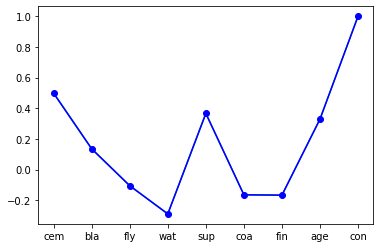

In [11]:
concrete1.corr().con.plot()
concrete1.corr().con.plot(style='bo-')

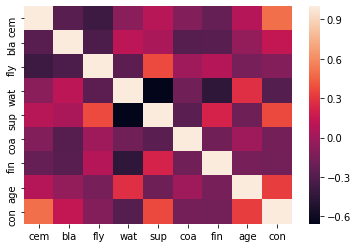

In [12]:
sns.heatmap(concrete1.corr())

#### In order to visualize with a pairplot, we will divide the target (con) into two categories

In [39]:
pd.qcut(concrete1.con, 2, labels=["low", "high"])

0       high
1       high
2       high
3       high
4       high
        ... 
1025    high
1026     low
1027     low
1028     low
1029     low
Name: con, Length: 1030, dtype: category
Categories (2, object): [low < high]

In [40]:
concrete2 = concrete1.copy()

In [41]:
concrete2.con = pd.qcut(concrete1.con, 2, labels=["low", "high"])
concrete2

,cem,bla,fly,wat,sup,coa,fin,age,con
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,high
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,high
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,high
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,high
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,high
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,high
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,low
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,low
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,low


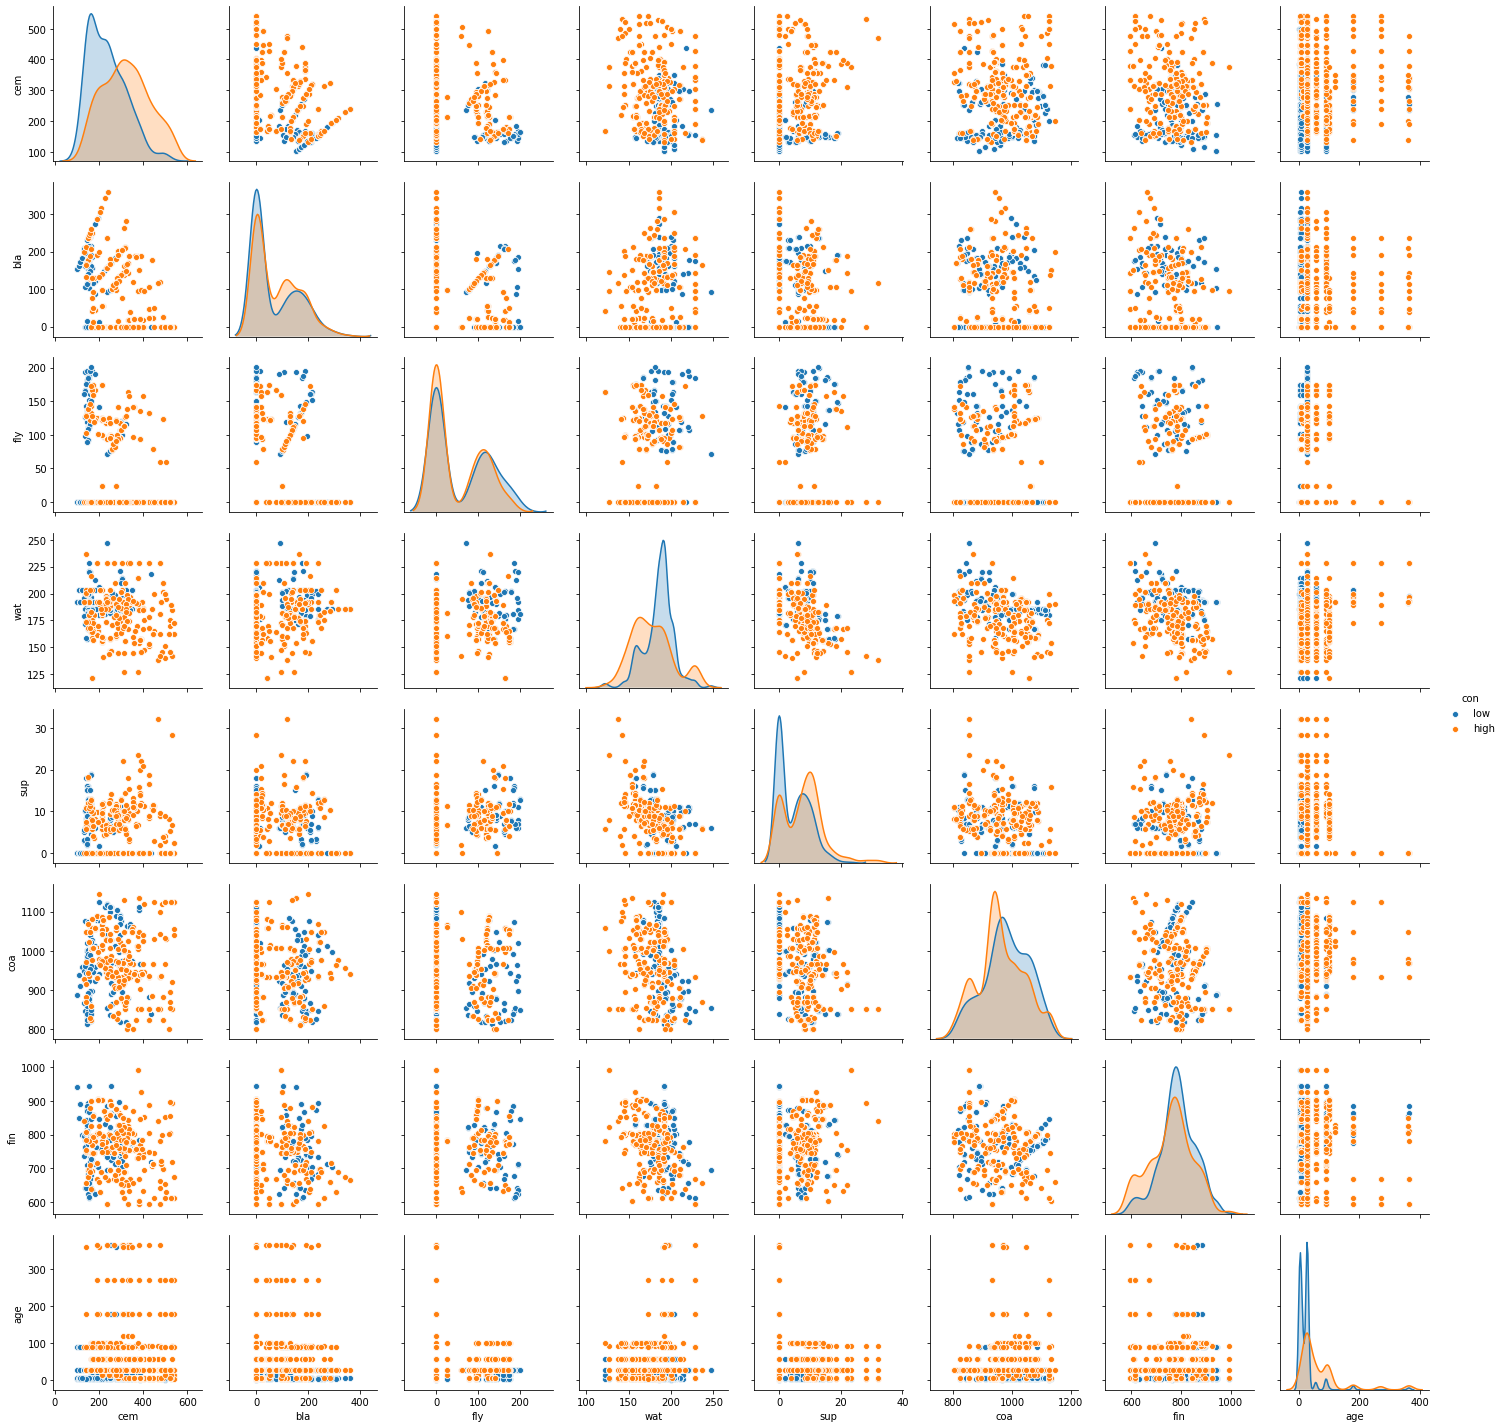

In [16]:
sns.pairplot(concrete2, hue='con')

This is to big to notice something, we'll chose wisely specific features

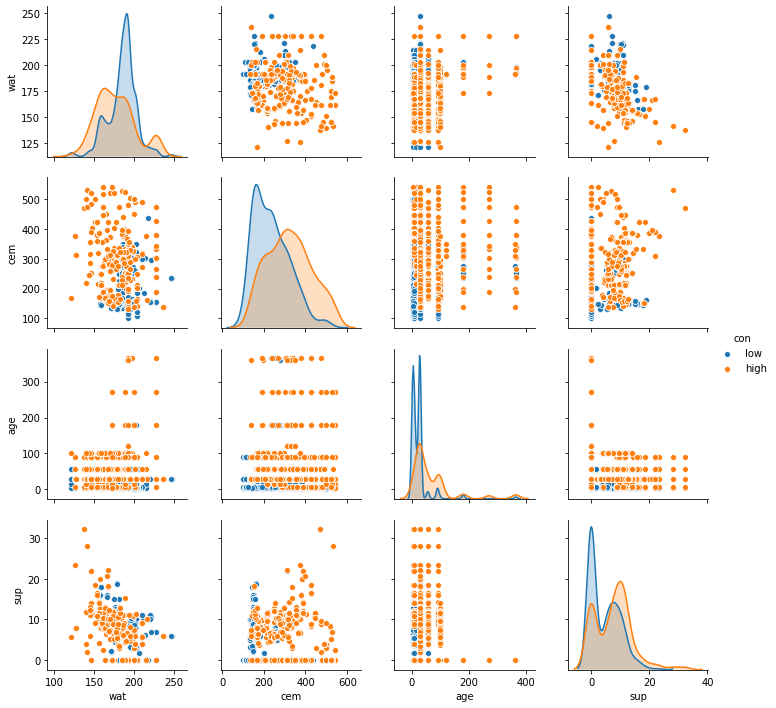

In [42]:
sns.pairplot(concrete2[ ['wat', 'cem', 'age', 'sup', 'con'] ], hue='con')

### Building the model

In [97]:
X = concrete1.iloc[:,:-1]
y = concrete1.iloc[:,-1]

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Scaling our dataframe

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xs = sc.fit(X_train)

In [100]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

For now I scale only X dataframe. Later we'll need to scale y also so it fits the sigmoid at the end

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [102]:
def model_score(X_train, X_test, y_train, y_test, model):
    global M
    if model == 'LR':
        model = LinearRegression()
    elif model == 'GB': 
        model = GradientBoostingRegressor(max_depth=5)
    elif model == 'RF':
        model = RandomForestRegressor(n_estimators=100)
    elif model == 'KNN':
        model = KNeighborsRegressor(n_neighbors=4)
    model.fit(X_train,y_train)
    print(f" Test score:  {model.score(X_test,y_test)} \n Train score: {model.score(X_train,y_train)}")
    M = model
    return model

In [103]:
model_score(X_train, X_test, y_train, y_test,'LR')

 Test score:  0.5969665653519136 
 Train score: 0.6194962499688508


LinearRegression()

In [104]:
model_score(X_train, X_test, y_train, y_test,'GB')

 Test score:  0.9108261349795111 
 Train score: 0.9872586537372977


GradientBoostingRegressor(max_depth=5)

In [105]:
model_score(X_train, X_test, y_train, y_test,'RF')

 Test score:  0.8854881509496945 
 Train score: 0.9842883113046133


RandomForestRegressor()

In [106]:
model_score(X_train, X_test, y_train, y_test,'KNN')

 Test score:  0.6905287278057701 
 Train score: 0.8456526419339221


KNeighborsRegressor(n_neighbors=4)

### Voting - ensemble model

In [94]:
from sklearn.ensemble import VotingRegressor

In [95]:
clf1 = LinearRegression()
clf2 = GradientBoostingRegressor()
clf3 = RandomForestRegressor()
clf4 = KNeighborsRegressor()

In [96]:
emodel = VotingRegressor(estimators=[
    ('lr', clf1),
    ('gb', clf2),
    ('rf', clf3),
    ('knn', clf4),
],
   )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
emodel.fit(X_train, y_train)
emodel.score(X_train, y_train), emodel.score(X_test, y_test)

(0.9092936036102716, 0.8448386480553371)

In [ ]:
# The voting process didn't improve our results.
# The best score was achieved for GB model with 91% (which is akready an ensebled model)
# The second best model was RF with 89%

### ANN - keras sequential model

In [16]:
feature_dataset = concrete1.iloc[:,:-1]
target_dataset = concrete1.iloc[:,-1] 

In [17]:
sc_X = StandardScaler()
X = sc_X.fit_transform(np.array(feature_dataset))
sc_y = StandardScaler()
y = sc_y.fit_transform(np.array(target_dataset).reshape(-1,1))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

In this step the model architecture can be tuned

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
np.random.seed(5)
model = Sequential()
model.add(Dense(150, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
model.summary()

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 150)               1350      
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_4 (Dense)              (None, 150)               22650     
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)              

In [23]:
def model_score(X_train, y_train, X_test, y_test):
    train_prediction = model.predict(X_train)
    train_score = 1 - ((y_train - train_prediction)**2).sum()/((y_train - y_train.mean())**2).sum()
    test_prediction = model.predict(X_test)
    test_score = 1 - ((y_test - test_prediction)**2).sum()/((y_test - y_test.mean())**2).sum()
    return [f'train score: {round(train_score,2)}, test score: {round(test_score,2)}'] 
    #print(f" Train score: {round(train_score,2)} \n Test score:  {round(test_score,2)}")

In [54]:
model_score(X_train, y_train, X_test, y_test)[0]

'train score: 0.99, test score: 0.92'

In [24]:
Batch_Size = [10,20,50]
epochs = [100,200,500]

In [25]:
scr_dict = {}
for batch in Batch_Size:
    for epoch in epochs:
        model.fit(X_train, y_train, batch_size=batch, epochs=epoch, verbose=1)
        key = f'batch_size:{batch}, epochs:{epoch}'
        d[key] = model_score(X_train, y_train, X_test, y_test)[0] 
        #print(f'For batch_size = {batch} and epochs = {epoch} the results are:')
        #model_score(X_train, y_train, X_test, y_test)


Epoch 1/100
824/824 [==============================] - 1s 1ms/step - loss: 0.6051 - mae: 0.6051
Epoch 2/100
824/824 [==============================] - 0s 442us/step - loss: 0.4780 - mae: 0.4780
Epoch 3/100
824/824 [==============================] - 0s 446us/step - loss: 0.4479 - mae: 0.4479
Epoch 4/100
824/824 [==============================] - 0s 441us/step - loss: 0.4058 - mae: 0.4058
Epoch 5/100
824/824 [==============================] - 0s 442us/step - loss: 0.3978 - mae: 0.3978
Epoch 6/100
824/824 [==============================] - 0s 434us/step - loss: 0.3840 - mae: 0.3840
Epoch 7/100
824/824 [==============================] - 0s 440us/step - loss: 0.3785 - mae: 0.3785
Epoch 8/100
824/824 [==============================] - 0s 437us/step - loss: 0.3629 - mae: 0.3629
Epoch 9/100
824/824 [==============================] - 0s 430us/step - loss: 0.3445 - mae: 0.3445
Epoch 10/100
824/824 [==============================] - 0s 435us/step - loss: 0.3472 - mae: 0.3472
Epoch 11/100
824/824

824/824 [==============================] - 0s 408us/step - loss: 0.2184 - mae: 0.2184
Epoch 82/100
824/824 [==============================] - 0s 404us/step - loss: 0.2098 - mae: 0.2098
Epoch 83/100
824/824 [==============================] - 0s 405us/step - loss: 0.2067 - mae: 0.2067
Epoch 84/100
824/824 [==============================] - 0s 402us/step - loss: 0.2102 - mae: 0.2102
Epoch 85/100
824/824 [==============================] - 0s 403us/step - loss: 0.2036 - mae: 0.2036
Epoch 86/100
824/824 [==============================] - 0s 410us/step - loss: 0.2136 - mae: 0.2136
Epoch 87/100
824/824 [==============================] - 0s 415us/step - loss: 0.2096 - mae: 0.2096
Epoch 88/100
824/824 [==============================] - 0s 404us/step - loss: 0.2147 - mae: 0.2147
Epoch 89/100
824/824 [==============================] - 0s 409us/step - loss: 0.2065 - mae: 0.2065
Epoch 90/100
824/824 [==============================] - 0s 410us/step - loss: 0.2165 - mae: 0.2165
Epoch 91/100
824/824 [=

824/824 [==============================] - 0s 414us/step - loss: 0.1796 - mae: 0.1796
Epoch 64/200
824/824 [==============================] - 0s 410us/step - loss: 0.1788 - mae: 0.1788
Epoch 65/200
824/824 [==============================] - 0s 411us/step - loss: 0.1796 - mae: 0.1796
Epoch 66/200
824/824 [==============================] - 0s 425us/step - loss: 0.1745 - mae: 0.1745
Epoch 67/200
824/824 [==============================] - 0s 419us/step - loss: 0.1756 - mae: 0.1756
Epoch 68/200
824/824 [==============================] - 0s 492us/step - loss: 0.1793 - mae: 0.1793
Epoch 69/200
824/824 [==============================] - 0s 433us/step - loss: 0.1706 - mae: 0.1706
Epoch 70/200
824/824 [==============================] - 0s 496us/step - loss: 0.1805 - mae: 0.1805
Epoch 71/200
824/824 [==============================] - 0s 428us/step - loss: 0.1697 - mae: 0.1697
Epoch 72/200
824/824 [==============================] - 0s 506us/step - loss: 0.1814 - mae: 0.1814
Epoch 73/200
824/824 [=

824/824 [==============================] - 0s 408us/step - loss: 0.1591 - mae: 0.1591
Epoch 145/200
824/824 [==============================] - 0s 407us/step - loss: 0.1672 - mae: 0.1672
Epoch 146/200
824/824 [==============================] - 0s 406us/step - loss: 0.1497 - mae: 0.1497
Epoch 147/200
824/824 [==============================] - 0s 405us/step - loss: 0.1660 - mae: 0.1660
Epoch 148/200
824/824 [==============================] - 0s 398us/step - loss: 0.1594 - mae: 0.1594
Epoch 149/200
824/824 [==============================] - 0s 420us/step - loss: 0.1684 - mae: 0.1684
Epoch 150/200
824/824 [==============================] - 0s 410us/step - loss: 0.1620 - mae: 0.1620
Epoch 151/200
824/824 [==============================] - 0s 408us/step - loss: 0.1507 - mae: 0.1507
Epoch 152/200
824/824 [==============================] - 0s 431us/step - loss: 0.1663 - mae: 0.1663
Epoch 153/200
824/824 [==============================] - 0s 422us/step - loss: 0.1618 - mae: 0.1618
Epoch 154/200


824/824 [==============================] - 0s 416us/step - loss: 0.1515 - mae: 0.1515
Epoch 26/500
824/824 [==============================] - 0s 410us/step - loss: 0.1469 - mae: 0.1469
Epoch 27/500
824/824 [==============================] - 0s 402us/step - loss: 0.1535 - mae: 0.1535
Epoch 28/500
824/824 [==============================] - 0s 408us/step - loss: 0.1489 - mae: 0.1489
Epoch 29/500
824/824 [==============================] - 0s 411us/step - loss: 0.1371 - mae: 0.1371
Epoch 30/500
824/824 [==============================] - 0s 410us/step - loss: 0.1470 - mae: 0.1470
Epoch 31/500
824/824 [==============================] - 0s 406us/step - loss: 0.1522 - mae: 0.1522
Epoch 32/500
824/824 [==============================] - 0s 403us/step - loss: 0.1491 - mae: 0.1491
Epoch 33/500
824/824 [==============================] - 0s 407us/step - loss: 0.1480 - mae: 0.1480
Epoch 34/500
824/824 [==============================] - 0s 409us/step - loss: 0.1552 - mae: 0.1552
Epoch 35/500
824/824 [=

824/824 [==============================] - 0s 405us/step - loss: 0.1386 - mae: 0.1386
Epoch 108/500
824/824 [==============================] - 0s 407us/step - loss: 0.1401 - mae: 0.1401
Epoch 109/500
824/824 [==============================] - 0s 407us/step - loss: 0.1426 - mae: 0.1426
Epoch 110/500
824/824 [==============================] - 0s 412us/step - loss: 0.1371 - mae: 0.1371
Epoch 111/500
824/824 [==============================] - 0s 409us/step - loss: 0.1400 - mae: 0.1400
Epoch 112/500
824/824 [==============================] - 0s 407us/step - loss: 0.1426 - mae: 0.1426
Epoch 113/500
824/824 [==============================] - 0s 409us/step - loss: 0.1357 - mae: 0.1357
Epoch 114/500
824/824 [==============================] - 0s 409us/step - loss: 0.1419 - mae: 0.1419
Epoch 115/500
824/824 [==============================] - 0s 404us/step - loss: 0.1347 - mae: 0.1347
Epoch 116/500
824/824 [==============================] - 0s 394us/step - loss: 0.1443 - mae: 0.1443
Epoch 117/500


824/824 [==============================] - 0s 412us/step - loss: 0.1357 - mae: 0.1357
Epoch 189/500
824/824 [==============================] - 0s 405us/step - loss: 0.1395 - mae: 0.1395
Epoch 190/500
824/824 [==============================] - 0s 407us/step - loss: 0.1288 - mae: 0.1288
Epoch 191/500
824/824 [==============================] - 0s 409us/step - loss: 0.1408 - mae: 0.1408
Epoch 192/500
824/824 [==============================] - 0s 402us/step - loss: 0.1431 - mae: 0.1431
Epoch 193/500
824/824 [==============================] - 0s 408us/step - loss: 0.1514 - mae: 0.1514
Epoch 194/500
824/824 [==============================] - 0s 405us/step - loss: 0.1338 - mae: 0.1338
Epoch 195/500
824/824 [==============================] - 0s 402us/step - loss: 0.1369 - mae: 0.1369
Epoch 196/500
824/824 [==============================] - 0s 408us/step - loss: 0.1425 - mae: 0.1425
Epoch 197/500
824/824 [==============================] - 0s 404us/step - loss: 0.1298 - mae: 0.1298
Epoch 198/500


824/824 [==============================] - 0s 419us/step - loss: 0.1331 - mae: 0.1331
Epoch 270/500
824/824 [==============================] - 0s 406us/step - loss: 0.1423 - mae: 0.1423
Epoch 271/500
824/824 [==============================] - 0s 407us/step - loss: 0.1426 - mae: 0.1426
Epoch 272/500
824/824 [==============================] - 0s 408us/step - loss: 0.1283 - mae: 0.1283
Epoch 273/500
824/824 [==============================] - 0s 410us/step - loss: 0.1207 - mae: 0.1206
Epoch 274/500
824/824 [==============================] - 0s 402us/step - loss: 0.1284 - mae: 0.1284
Epoch 275/500
824/824 [==============================] - 0s 409us/step - loss: 0.1308 - mae: 0.1308
Epoch 276/500
824/824 [==============================] - 0s 405us/step - loss: 0.1477 - mae: 0.1477
Epoch 277/500
824/824 [==============================] - 0s 411us/step - loss: 0.1310 - mae: 0.1310
Epoch 278/500
824/824 [==============================] - 0s 408us/step - loss: 0.1377 - mae: 0.1377
Epoch 279/500


824/824 [==============================] - 0s 417us/step - loss: 0.1349 - mae: 0.1349
Epoch 351/500
824/824 [==============================] - 0s 403us/step - loss: 0.1381 - mae: 0.1381
Epoch 352/500
824/824 [==============================] - 0s 432us/step - loss: 0.1311 - mae: 0.1311
Epoch 353/500
824/824 [==============================] - 0s 429us/step - loss: 0.1381 - mae: 0.1381
Epoch 354/500
824/824 [==============================] - 0s 413us/step - loss: 0.1386 - mae: 0.1386
Epoch 355/500
824/824 [==============================] - 0s 412us/step - loss: 0.1262 - mae: 0.1262
Epoch 356/500
824/824 [==============================] - 0s 435us/step - loss: 0.1285 - mae: 0.1285
Epoch 357/500
824/824 [==============================] - 0s 410us/step - loss: 0.1359 - mae: 0.1359
Epoch 358/500
824/824 [==============================] - 0s 445us/step - loss: 0.1323 - mae: 0.1323
Epoch 359/500
824/824 [==============================] - 0s 404us/step - loss: 0.1249 - mae: 0.1249
Epoch 360/500


824/824 [==============================] - 0s 396us/step - loss: 0.1304 - mae: 0.1304
Epoch 433/500
824/824 [==============================] - 0s 295us/step - loss: 0.1255 - mae: 0.1255
Epoch 434/500
824/824 [==============================] - 0s 448us/step - loss: 0.1237 - mae: 0.1237
Epoch 435/500
824/824 [==============================] - 0s 408us/step - loss: 0.1260 - mae: 0.1260
Epoch 436/500
824/824 [==============================] - 0s 410us/step - loss: 0.1259 - mae: 0.1259
Epoch 437/500
824/824 [==============================] - 0s 381us/step - loss: 0.1190 - mae: 0.1190
Epoch 438/500
824/824 [==============================] - 0s 390us/step - loss: 0.1209 - mae: 0.1209
Epoch 439/500
824/824 [==============================] - 0s 387us/step - loss: 0.1184 - mae: 0.1184
Epoch 440/500
824/824 [==============================] - 0s 389us/step - loss: 0.1232 - mae: 0.1232
Epoch 441/500
824/824 [==============================] - 0s 386us/step - loss: 0.1301 - mae: 0.1301
Epoch 442/500


824/824 [==============================] - 0s 249us/step - loss: 0.1108 - mae: 0.1108
Epoch 13/100
824/824 [==============================] - 0s 246us/step - loss: 0.1094 - mae: 0.1094
Epoch 14/100
824/824 [==============================] - 0s 252us/step - loss: 0.1110 - mae: 0.1110
Epoch 15/100
824/824 [==============================] - 0s 261us/step - loss: 0.1081 - mae: 0.1081
Epoch 16/100
824/824 [==============================] - 0s 237us/step - loss: 0.1109 - mae: 0.1109
Epoch 17/100
824/824 [==============================] - 0s 248us/step - loss: 0.1102 - mae: 0.1102
Epoch 18/100
824/824 [==============================] - 0s 250us/step - loss: 0.1076 - mae: 0.1076
Epoch 19/100
824/824 [==============================] - 0s 251us/step - loss: 0.1137 - mae: 0.1137
Epoch 20/100
824/824 [==============================] - 0s 248us/step - loss: 0.1105 - mae: 0.1105
Epoch 21/100
824/824 [==============================] - 0s 252us/step - loss: 0.1118 - mae: 0.1118
Epoch 22/100
824/824 [=

824/824 [==============================] - 0s 260us/step - loss: 0.1119 - mae: 0.1119
Epoch 95/100
824/824 [==============================] - 0s 250us/step - loss: 0.1169 - mae: 0.1169
Epoch 96/100
824/824 [==============================] - 0s 246us/step - loss: 0.1146 - mae: 0.1146
Epoch 97/100
824/824 [==============================] - 0s 243us/step - loss: 0.1189 - mae: 0.1189
Epoch 98/100
824/824 [==============================] - 0s 250us/step - loss: 0.1136 - mae: 0.1136
Epoch 99/100
824/824 [==============================] - 0s 239us/step - loss: 0.1062 - mae: 0.1062
Epoch 100/100
824/824 [==============================] - 0s 241us/step - loss: 0.1015 - mae: 0.1015
Epoch 1/200
824/824 [==============================] - 0s 236us/step - loss: 0.1076 - mae: 0.1076
Epoch 2/200
824/824 [==============================] - 0s 231us/step - loss: 0.1041 - mae: 0.1041
Epoch 3/200
824/824 [==============================] - 0s 244us/step - loss: 0.1028 - mae: 0.1028
Epoch 4/200
824/824 [====

Epoch 77/200
824/824 [==============================] - 0s 243us/step - loss: 0.1161 - mae: 0.1161
Epoch 78/200
824/824 [==============================] - 0s 279us/step - loss: 0.1074 - mae: 0.1074
Epoch 79/200
824/824 [==============================] - 0s 250us/step - loss: 0.1082 - mae: 0.1082
Epoch 80/200
824/824 [==============================] - 0s 249us/step - loss: 0.1055 - mae: 0.1055
Epoch 81/200
824/824 [==============================] - 0s 263us/step - loss: 0.1068 - mae: 0.1068
Epoch 82/200
824/824 [==============================] - 0s 245us/step - loss: 0.1129 - mae: 0.1129
Epoch 83/200
824/824 [==============================] - 0s 240us/step - loss: 0.1074 - mae: 0.1074
Epoch 84/200
824/824 [==============================] - 0s 232us/step - loss: 0.1090 - mae: 0.1090
Epoch 85/200
824/824 [==============================] - 0s 263us/step - loss: 0.1086 - mae: 0.1086
Epoch 86/200
824/824 [==============================] - 0s 272us/step - loss: 0.1051 - mae: 0.1051
Epoch 87/2

824/824 [==============================] - 0s 275us/step - loss: 0.1064 - mae: 0.1064
Epoch 160/200
824/824 [==============================] - 0s 277us/step - loss: 0.1143 - mae: 0.1143
Epoch 161/200
824/824 [==============================] - 0s 288us/step - loss: 0.1013 - mae: 0.1013
Epoch 162/200
824/824 [==============================] - 0s 239us/step - loss: 0.1063 - mae: 0.1063
Epoch 163/200
824/824 [==============================] - 0s 233us/step - loss: 0.1112 - mae: 0.1112
Epoch 164/200
824/824 [==============================] - 0s 283us/step - loss: 0.1057 - mae: 0.1057
Epoch 165/200
824/824 [==============================] - 0s 240us/step - loss: 0.1064 - mae: 0.1064
Epoch 166/200
824/824 [==============================] - 0s 238us/step - loss: 0.1052 - mae: 0.1052
Epoch 167/200
824/824 [==============================] - 0s 238us/step - loss: 0.1014 - mae: 0.1014
Epoch 168/200
824/824 [==============================] - 0s 277us/step - loss: 0.1047 - mae: 0.1047
Epoch 169/200


824/824 [==============================] - 0s 245us/step - loss: 0.1046 - mae: 0.1046
Epoch 42/500
824/824 [==============================] - 0s 261us/step - loss: 0.1073 - mae: 0.1073
Epoch 43/500
824/824 [==============================] - 0s 262us/step - loss: 0.1090 - mae: 0.1090
Epoch 44/500
824/824 [==============================] - 0s 272us/step - loss: 0.1065 - mae: 0.1065
Epoch 45/500
824/824 [==============================] - 0s 252us/step - loss: 0.1063 - mae: 0.1063
Epoch 46/500
824/824 [==============================] - 0s 243us/step - loss: 0.1037 - mae: 0.1037
Epoch 47/500
824/824 [==============================] - 0s 249us/step - loss: 0.1063 - mae: 0.1063
Epoch 48/500
824/824 [==============================] - 0s 256us/step - loss: 0.1067 - mae: 0.1067
Epoch 49/500
824/824 [==============================] - 0s 246us/step - loss: 0.1101 - mae: 0.1101
Epoch 50/500
824/824 [==============================] - 0s 247us/step - loss: 0.1045 - mae: 0.1045
Epoch 51/500
824/824 [=

824/824 [==============================] - 0s 246us/step - loss: 0.1033 - mae: 0.1033
Epoch 124/500
824/824 [==============================] - 0s 250us/step - loss: 0.1009 - mae: 0.1009
Epoch 125/500
824/824 [==============================] - 0s 250us/step - loss: 0.1038 - mae: 0.1038
Epoch 126/500
824/824 [==============================] - 0s 251us/step - loss: 0.1027 - mae: 0.1027
Epoch 127/500
824/824 [==============================] - 0s 240us/step - loss: 0.1085 - mae: 0.1085
Epoch 128/500
824/824 [==============================] - 0s 247us/step - loss: 0.1042 - mae: 0.1042
Epoch 129/500
824/824 [==============================] - 0s 250us/step - loss: 0.1072 - mae: 0.1072
Epoch 130/500
824/824 [==============================] - 0s 252us/step - loss: 0.1015 - mae: 0.1015
Epoch 131/500
824/824 [==============================] - 0s 254us/step - loss: 0.1024 - mae: 0.1024
Epoch 132/500
824/824 [==============================] - 0s 250us/step - loss: 0.0988 - mae: 0.0988
Epoch 133/500


824/824 [==============================] - 0s 242us/step - loss: 0.0994 - mae: 0.0994
Epoch 205/500
824/824 [==============================] - 0s 250us/step - loss: 0.1029 - mae: 0.1029
Epoch 206/500
824/824 [==============================] - 0s 251us/step - loss: 0.0974 - mae: 0.0974
Epoch 207/500
824/824 [==============================] - 0s 278us/step - loss: 0.0951 - mae: 0.0951
Epoch 208/500
824/824 [==============================] - 0s 254us/step - loss: 0.1024 - mae: 0.1024
Epoch 209/500
824/824 [==============================] - 0s 246us/step - loss: 0.1034 - mae: 0.1034
Epoch 210/500
824/824 [==============================] - 0s 244us/step - loss: 0.1067 - mae: 0.1067
Epoch 211/500
824/824 [==============================] - 0s 288us/step - loss: 0.1033 - mae: 0.1033
Epoch 212/500
824/824 [==============================] - 0s 272us/step - loss: 0.0968 - mae: 0.0968
Epoch 213/500
824/824 [==============================] - 0s 280us/step - loss: 0.1079 - mae: 0.1079
Epoch 214/500


824/824 [==============================] - 0s 243us/step - loss: 0.1062 - mae: 0.1062
Epoch 287/500
824/824 [==============================] - 0s 244us/step - loss: 0.1005 - mae: 0.1005
Epoch 288/500
824/824 [==============================] - 0s 244us/step - loss: 0.1046 - mae: 0.1046
Epoch 289/500
824/824 [==============================] - 0s 245us/step - loss: 0.0988 - mae: 0.0988
Epoch 290/500
824/824 [==============================] - 0s 234us/step - loss: 0.1128 - mae: 0.1128
Epoch 291/500
824/824 [==============================] - 0s 240us/step - loss: 0.1048 - mae: 0.1048
Epoch 292/500
824/824 [==============================] - 0s 256us/step - loss: 0.0969 - mae: 0.0969
Epoch 293/500
824/824 [==============================] - 0s 239us/step - loss: 0.1017 - mae: 0.1017
Epoch 294/500
824/824 [==============================] - 0s 235us/step - loss: 0.1042 - mae: 0.1042
Epoch 295/500
824/824 [==============================] - 0s 244us/step - loss: 0.1018 - mae: 0.1018
Epoch 296/500


824/824 [==============================] - 0s 245us/step - loss: 0.1008 - mae: 0.1008
Epoch 369/500
824/824 [==============================] - 0s 237us/step - loss: 0.1010 - mae: 0.1010
Epoch 370/500
824/824 [==============================] - 0s 240us/step - loss: 0.0991 - mae: 0.0991
Epoch 371/500
824/824 [==============================] - 0s 229us/step - loss: 0.0973 - mae: 0.0973
Epoch 372/500
824/824 [==============================] - 0s 237us/step - loss: 0.1033 - mae: 0.1033
Epoch 373/500
824/824 [==============================] - 0s 243us/step - loss: 0.0996 - mae: 0.0996
Epoch 374/500
824/824 [==============================] - 0s 249us/step - loss: 0.1049 - mae: 0.1049
Epoch 375/500
824/824 [==============================] - 0s 241us/step - loss: 0.1036 - mae: 0.1036
Epoch 376/500
824/824 [==============================] - 0s 242us/step - loss: 0.0978 - mae: 0.0978
Epoch 377/500
824/824 [==============================] - 0s 241us/step - loss: 0.1002 - mae: 0.1002
Epoch 378/500


824/824 [==============================] - 0s 244us/step - loss: 0.0973 - mae: 0.0973
Epoch 451/500
824/824 [==============================] - 0s 314us/step - loss: 0.0956 - mae: 0.0956
Epoch 452/500
824/824 [==============================] - 0s 285us/step - loss: 0.0950 - mae: 0.0950
Epoch 453/500
824/824 [==============================] - 0s 241us/step - loss: 0.0928 - mae: 0.0928
Epoch 454/500
824/824 [==============================] - 0s 248us/step - loss: 0.1027 - mae: 0.1027
Epoch 455/500
824/824 [==============================] - 0s 248us/step - loss: 0.0971 - mae: 0.0971
Epoch 456/500
824/824 [==============================] - 0s 248us/step - loss: 0.0965 - mae: 0.0965
Epoch 457/500
824/824 [==============================] - 0s 252us/step - loss: 0.1008 - mae: 0.1008
Epoch 458/500
824/824 [==============================] - 0s 240us/step - loss: 0.0989 - mae: 0.0989
Epoch 459/500
824/824 [==============================] - 0s 251us/step - loss: 0.1001 - mae: 0.1001
Epoch 460/500


824/824 [==============================] - 0s 150us/step - loss: 0.0865 - mae: 0.0865
Epoch 33/100
824/824 [==============================] - 0s 141us/step - loss: 0.0889 - mae: 0.0889
Epoch 34/100
824/824 [==============================] - 0s 148us/step - loss: 0.0871 - mae: 0.0871
Epoch 35/100
824/824 [==============================] - 0s 139us/step - loss: 0.0838 - mae: 0.0838
Epoch 36/100
824/824 [==============================] - 0s 138us/step - loss: 0.0845 - mae: 0.0845
Epoch 37/100
824/824 [==============================] - 0s 141us/step - loss: 0.0847 - mae: 0.0847
Epoch 38/100
824/824 [==============================] - 0s 140us/step - loss: 0.0905 - mae: 0.0905
Epoch 39/100
824/824 [==============================] - 0s 149us/step - loss: 0.0926 - mae: 0.0926
Epoch 40/100
824/824 [==============================] - 0s 137us/step - loss: 0.0873 - mae: 0.0873
Epoch 41/100
824/824 [==============================] - 0s 136us/step - loss: 0.0888 - mae: 0.0888
Epoch 42/100
824/824 [=

824/824 [==============================] - 0s 154us/step - loss: 0.0908 - mae: 0.0908
Epoch 15/200
824/824 [==============================] - ETA: 0s - loss: 0.0955 - mae: 0.095 - 0s 133us/step - loss: 0.0918 - mae: 0.0918
Epoch 16/200
824/824 [==============================] - 0s 146us/step - loss: 0.0852 - mae: 0.0852
Epoch 17/200
824/824 [==============================] - 0s 150us/step - loss: 0.0925 - mae: 0.0925
Epoch 18/200
824/824 [==============================] - 0s 157us/step - loss: 0.0868 - mae: 0.0868
Epoch 19/200
824/824 [==============================] - 0s 151us/step - loss: 0.0842 - mae: 0.0842
Epoch 20/200
824/824 [==============================] - 0s 153us/step - loss: 0.0905 - mae: 0.0905
Epoch 21/200
824/824 [==============================] - 0s 157us/step - loss: 0.0872 - mae: 0.0872
Epoch 22/200
824/824 [==============================] - 0s 157us/step - loss: 0.0896 - mae: 0.0896
Epoch 23/200
824/824 [==============================] - 0s 140us/step - loss: 0.0962

824/824 [==============================] - 0s 134us/step - loss: 0.0871 - mae: 0.0871
Epoch 97/200
824/824 [==============================] - 0s 136us/step - loss: 0.0864 - mae: 0.0864
Epoch 98/200
824/824 [==============================] - 0s 129us/step - loss: 0.0918 - mae: 0.0918
Epoch 99/200
824/824 [==============================] - 0s 131us/step - loss: 0.0944 - mae: 0.0944
Epoch 100/200
824/824 [==============================] - 0s 132us/step - loss: 0.0964 - mae: 0.0964
Epoch 101/200
824/824 [==============================] - 0s 130us/step - loss: 0.0857 - mae: 0.0857
Epoch 102/200
824/824 [==============================] - 0s 125us/step - loss: 0.0916 - mae: 0.0916
Epoch 103/200
824/824 [==============================] - 0s 121us/step - loss: 0.0829 - mae: 0.0829
Epoch 104/200
824/824 [==============================] - 0s 141us/step - loss: 0.0953 - mae: 0.0953
Epoch 105/200
824/824 [==============================] - 0s 138us/step - loss: 0.0946 - mae: 0.0946
Epoch 106/200
824

824/824 [==============================] - 0s 132us/step - loss: 0.0974 - mae: 0.0974
Epoch 179/200
824/824 [==============================] - 0s 135us/step - loss: 0.0946 - mae: 0.0946
Epoch 180/200
824/824 [==============================] - 0s 135us/step - loss: 0.0892 - mae: 0.0892
Epoch 181/200
824/824 [==============================] - 0s 136us/step - loss: 0.0921 - mae: 0.0921
Epoch 182/200
824/824 [==============================] - 0s 135us/step - loss: 0.0910 - mae: 0.0910
Epoch 183/200
824/824 [==============================] - 0s 133us/step - loss: 0.0924 - mae: 0.0924
Epoch 184/200
824/824 [==============================] - 0s 129us/step - loss: 0.0868 - mae: 0.0868
Epoch 185/200
824/824 [==============================] - 0s 134us/step - loss: 0.0900 - mae: 0.0900
Epoch 186/200
824/824 [==============================] - 0s 135us/step - loss: 0.0822 - mae: 0.0822
Epoch 187/200
824/824 [==============================] - 0s 129us/step - loss: 0.0925 - mae: 0.0925
Epoch 188/200


824/824 [==============================] - 0s 127us/step - loss: 0.0889 - mae: 0.0889
Epoch 61/500
824/824 [==============================] - 0s 136us/step - loss: 0.0833 - mae: 0.0833
Epoch 62/500
824/824 [==============================] - 0s 132us/step - loss: 0.0893 - mae: 0.0893
Epoch 63/500
824/824 [==============================] - 0s 128us/step - loss: 0.0855 - mae: 0.0855
Epoch 64/500
824/824 [==============================] - 0s 128us/step - loss: 0.0882 - mae: 0.0882
Epoch 65/500
824/824 [==============================] - 0s 133us/step - loss: 0.0863 - mae: 0.0863
Epoch 66/500
824/824 [==============================] - 0s 133us/step - loss: 0.0910 - mae: 0.0910
Epoch 67/500
824/824 [==============================] - 0s 135us/step - loss: 0.0893 - mae: 0.0893 0s - loss: 0.0957 - mae: 0.095
Epoch 68/500
824/824 [==============================] - 0s 127us/step - loss: 0.0853 - mae: 0.0853
Epoch 69/500
824/824 [==============================] - 0s 134us/step - loss: 0.0894 - mae:

824/824 [==============================] - 0s 131us/step - loss: 0.0917 - mae: 0.0917
Epoch 142/500
824/824 [==============================] - 0s 134us/step - loss: 0.0896 - mae: 0.0896
Epoch 143/500
824/824 [==============================] - 0s 133us/step - loss: 0.0906 - mae: 0.0906
Epoch 144/500
824/824 [==============================] - 0s 132us/step - loss: 0.0847 - mae: 0.0847
Epoch 145/500
824/824 [==============================] - 0s 135us/step - loss: 0.0895 - mae: 0.0895
Epoch 146/500
824/824 [==============================] - 0s 135us/step - loss: 0.0891 - mae: 0.0891
Epoch 147/500
824/824 [==============================] - 0s 135us/step - loss: 0.0804 - mae: 0.0804
Epoch 148/500
824/824 [==============================] - 0s 141us/step - loss: 0.0877 - mae: 0.0877
Epoch 149/500
824/824 [==============================] - 0s 132us/step - loss: 0.0863 - mae: 0.0863
Epoch 150/500
824/824 [==============================] - 0s 135us/step - loss: 0.0833 - mae: 0.0833
Epoch 151/500


824/824 [==============================] - 0s 131us/step - loss: 0.0881 - mae: 0.0881
Epoch 224/500
824/824 [==============================] - 0s 129us/step - loss: 0.0874 - mae: 0.0874
Epoch 225/500
824/824 [==============================] - 0s 135us/step - loss: 0.0849 - mae: 0.0849
Epoch 226/500
824/824 [==============================] - 0s 137us/step - loss: 0.0960 - mae: 0.0960
Epoch 227/500
824/824 [==============================] - 0s 133us/step - loss: 0.0869 - mae: 0.0869
Epoch 228/500
824/824 [==============================] - 0s 130us/step - loss: 0.0859 - mae: 0.0859
Epoch 229/500
824/824 [==============================] - 0s 132us/step - loss: 0.0878 - mae: 0.0878
Epoch 230/500
824/824 [==============================] - 0s 133us/step - loss: 0.0870 - mae: 0.0870
Epoch 231/500
824/824 [==============================] - 0s 129us/step - loss: 0.0877 - mae: 0.0877
Epoch 232/500
824/824 [==============================] - 0s 138us/step - loss: 0.0872 - mae: 0.0872
Epoch 233/500


824/824 [==============================] - 0s 150us/step - loss: 0.0857 - mae: 0.0857
Epoch 305/500
824/824 [==============================] - 0s 136us/step - loss: 0.0863 - mae: 0.0863
Epoch 306/500
824/824 [==============================] - 0s 133us/step - loss: 0.0846 - mae: 0.0846
Epoch 307/500
824/824 [==============================] - 0s 135us/step - loss: 0.0896 - mae: 0.0896
Epoch 308/500
824/824 [==============================] - 0s 132us/step - loss: 0.0826 - mae: 0.0826
Epoch 309/500
824/824 [==============================] - 0s 134us/step - loss: 0.0847 - mae: 0.0847
Epoch 310/500
824/824 [==============================] - 0s 134us/step - loss: 0.0831 - mae: 0.0831
Epoch 311/500
824/824 [==============================] - 0s 131us/step - loss: 0.0905 - mae: 0.0905
Epoch 312/500
824/824 [==============================] - 0s 133us/step - loss: 0.0867 - mae: 0.0867
Epoch 313/500
824/824 [==============================] - 0s 132us/step - loss: 0.0835 - mae: 0.0835
Epoch 314/500


824/824 [==============================] - 0s 136us/step - loss: 0.0842 - mae: 0.0842
Epoch 386/500
824/824 [==============================] - 0s 132us/step - loss: 0.0887 - mae: 0.0887
Epoch 387/500
824/824 [==============================] - 0s 132us/step - loss: 0.0887 - mae: 0.0887
Epoch 388/500
824/824 [==============================] - 0s 126us/step - loss: 0.0851 - mae: 0.0851
Epoch 389/500
824/824 [==============================] - 0s 133us/step - loss: 0.0874 - mae: 0.0874
Epoch 390/500
824/824 [==============================] - 0s 133us/step - loss: 0.0845 - mae: 0.0845
Epoch 391/500
824/824 [==============================] - 0s 138us/step - loss: 0.0832 - mae: 0.0832
Epoch 392/500
824/824 [==============================] - 0s 133us/step - loss: 0.0826 - mae: 0.0826
Epoch 393/500
824/824 [==============================] - 0s 127us/step - loss: 0.0879 - mae: 0.0879
Epoch 394/500
824/824 [==============================] - 0s 136us/step - loss: 0.0866 - mae: 0.0866
Epoch 395/500


824/824 [==============================] - 0s 131us/step - loss: 0.0850 - mae: 0.0850
Epoch 468/500
824/824 [==============================] - 0s 138us/step - loss: 0.0806 - mae: 0.0806
Epoch 469/500
824/824 [==============================] - 0s 131us/step - loss: 0.0825 - mae: 0.0825
Epoch 470/500
824/824 [==============================] - 0s 134us/step - loss: 0.0886 - mae: 0.0886
Epoch 471/500
824/824 [==============================] - 0s 136us/step - loss: 0.0878 - mae: 0.0878
Epoch 472/500
824/824 [==============================] - 0s 135us/step - loss: 0.0895 - mae: 0.0895
Epoch 473/500
824/824 [==============================] - 0s 130us/step - loss: 0.0862 - mae: 0.0862
Epoch 474/500
824/824 [==============================] - 0s 131us/step - loss: 0.0860 - mae: 0.0860
Epoch 475/500
824/824 [==============================] - 0s 134us/step - loss: 0.0865 - mae: 0.0865
Epoch 476/500
824/824 [==============================] - 0s 131us/step - loss: 0.0835 - mae: 0.0835
Epoch 477/500


In [26]:
scr_dict

{'batch_size:10, epochs:100': 'train score: 0.96, test score: 0.91',
 'batch_size:10, epochs:200': 'train score: 0.98, test score: 0.91',
 'batch_size:10, epochs:500': 'train score: 0.98, test score: 0.91',
 'batch_size:20, epochs:100': 'train score: 0.98, test score: 0.9',
 'batch_size:20, epochs:200': 'train score: 0.99, test score: 0.91',
 'batch_size:20, epochs:500': 'train score: 0.99, test score: 0.91',
 'batch_size:50, epochs:100': 'train score: 0.99, test score: 0.92',
 'batch_size:50, epochs:200': 'train score: 0.99, test score: 0.92',
 'batch_size:50, epochs:500': 'train score: 0.99, test score: 0.92'}

### Summary

In [ ]:
# 1. In the beginning of the project we get to know the data
# 2. We continue with some data visualization and correlations between features
# 3. Then we start building different models: LR, GB, RF, KNN
# 4. We continue with ANN squential model
# 5. Best score: 92%, model: sequential, batch_size: 50, epochs: 500

#### Final comments

In [ ]:
# 1. All the models can be tuned with the hyperparamters
# 2. For the ANN model we may also play more with the architecture
# 3. There is an overfitting problem which can be solved by regularization or cross-validation